In [ ]:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

In [ ]:
%load_ext sql

In [ ]:
# connect to IBM Db2
%sql ibm_db_sa://xkl26971:UhgeIi5wuJcNwZPI@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB?security=SSL

In [1]:
import pandas
russian_personnel = pandas.read_csv('russia_losses_personnel.csv')
russian_equipment = pandas.read_csv('russia_losses_equipment.csv')

# %sql PERSIST ressian_personnel
# %sql PERSIST ressian_equipment

### Problem 1
##### Where is the war happening?

In [ ]:
from IPython.core.display import display
from PIL import Image
import urllib.request

# Downloading dataset
urllib.request.urlretrieve("https://cdn.vox-cdn.com/uploads/chorus_asset/file/23351348/DraftUkraineCoTMarch28_2022.png", "study_of_war.jpg")

# Read image
img = Image.open('Study_of_war.jpg')

# Display Image specs
display(img)

### Problem 2

##### Find the total number of Prisoners of War per day recorded in the Personel table.


Total Prisoners of War as at 03/31/2022 is 11101


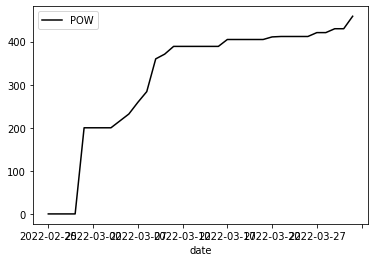

In [37]:
russian_personnel.plot(x='date', y='POW', kind='line', color='black')

p = sum(russian_personnel['POW'])
print(f'Total Prisoners of War as at 03/31/2022 is {p}')

# %%sql
# select count(pow) total_prisoners_of_war
#     FROM russian_personnel;

### Problem 3

##### List the total equipment lost per day and equipment type.


In [38]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

x=russian_equipment['date']
y0=russian_equipment['aircraft']
y1=russian_equipment['helicopter']
y2=russian_equipment['tank']
y3=russian_equipment['APC']
y4=russian_equipment['field artillery']
y5=russian_equipment['MRL']
y6=russian_equipment['military auto']
y7=russian_equipment['fuel tank']
y8=russian_equipment['drone']
y9=russian_equipment['naval ship']
y10=russian_equipment['anti-aircraft warfare']
y11=russian_equipment['special equipment']
y12=russian_equipment['mobile SRBM system']

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y0, mode='lines+markers', name='Aircraft'))
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='Helicopter'))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name='Tank'))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name='APC'))
fig.add_trace(go.Scatter(x=x, y=y4, mode='lines+markers', name='Field Artillery'))
fig.add_trace(go.Scatter(x=x, y=y5, mode='lines+markers', name='MRL'))
fig.add_trace(go.Scatter(x=x, y=y6, mode='lines+markers', name='Military Auto'))
fig.add_trace(go.Scatter(x=x, y=y7, mode='lines+markers', name='Fuel Tank'))
fig.add_trace(go.Scatter(x=x, y=y8, mode='lines+markers', name='Drone'))
fig.add_trace(go.Scatter(x=x, y=y9, mode='lines+markers', name='Naval Ship'))
fig.add_trace(go.Scatter(x=x, y=y10, mode='lines+markers', name='Anti-Aircraft Warfare'))
fig.add_trace(go.Scatter(x=x, y=y11, mode='lines+markers', name='Special Equipment'))
fig.add_trace(go.Scatter(x=x, y=y12, mode='lines+markers', name='Mobile SRBM System'))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Problem 4

##### ???


### Problem 5

##### Is there any correlarion between the POW and equipment loss?


In [87]:
import pandas as pd

print('There is a very strong corralation between POW and Equipment Loss')

merged = pd.merge(russian_equipment, russian_personnel, how='right')
merged.drop(['date', 'day', 'personnel', 'personnel*'], axis=1).corr()
# merged

There is a very strong corralation between POW and Equipment Loss


,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,POW
aircraft,1.000000,0.958030,0.986681,0.985661,0.980955,0.932685,0.984591,0.790361,0.876769,0.845159,0.961409,0.977358,0.638145,0.832289
helicopter,0.958030,1.000000,0.974495,0.977661,0.936804,0.942787,0.960036,0.659172,0.752798,0.738634,0.985186,0.935362,0.415227,0.913131
tank,0.986681,0.974495,1.000000,0.995532,0.978506,0.972327,0.989998,0.765339,0.848092,0.824625,0.985729,0.991246,0.601439,0.893547
APC,0.985661,0.977661,0.995532,1.000000,0.976785,0.965826,0.992882,0.742285,0.828527,0.793996,0.983687,0.980174,0.733001,0.889736
field artillery,0.980955,0.936804,0.978506,0.976785,1.000000,0.934345,0.991497,0.841601,0.905796,0.851163,0.946433,0.972810,0.597614,0.801616
MRL,0.932685,0.942787,0.972327,0.965826,0.934345,1.000000,0.959239,0.695568,0.780222,0.774764,0.977826,0.989507,0.826874,0.930818
military auto,0.984591,0.960036,0.989998,0.992882,0.991497,0.959239,1.000000,0.779564,0.860564,0.819203,0.971924,0.988191,0.610665,0.855031
fuel tank,0.790361,0.659172,0.765339,0.742285,0.841601,0.695568,0.779564,1.000000,0.962694,0.895488,0.675323,0.936244,0.316228,0.481549
drone,0.876769,0.752798,0.848092,0.828527,0.905796,0.780222,0.860564,0.962694,1.000000,0.940779,0.770281,0.973084,0.534864,0.580938
naval ship,0.845159,0.738634,0.824625,0.793996,0.851163,0.774764,0.819203,0.895488,0.940779,1.000000,0.766742,0.946893,NaN,0.602629


### Problem 6

##### What inferences can you make from the above relationship?
